In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the cleaned dataset (adjust path as needed)
df = pd.read_csv('cleaned_digital_wallet_transactions.csv')

In [5]:
# Inspect the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 5000 non-null   int64  
 1   transaction_id      5000 non-null   object 
 2   user_id             5000 non-null   object 
 3   transaction_date    5000 non-null   object 
 4   product_category    5000 non-null   object 
 5   product_name        5000 non-null   object 
 6   merchant_name       5000 non-null   object 
 7   product_amount      5000 non-null   float64
 8   transaction_fee     5000 non-null   float64
 9   cashback            5000 non-null   float64
 10  loyalty_points      5000 non-null   int64  
 11  payment_method      5000 non-null   object 
 12  transaction_status  5000 non-null   object 
 13  merchant_id         5000 non-null   object 
 14  device_type         5000 non-null   object 
 15  location            5000 non-null   object 
 16  transa

In [7]:
# Inspect the product_name column
df['product_name'].value_counts()

product_name
Python Programming Course    80
Basic Plan                   74
Standard Plan                66
3 Idiots                     64
Commercial Property          63
                             ..
Non-AC Seater                40
Premium Skin                 38
Mixed Fruit Jam              37
Outstation Trip              37
Rs. 1000 Shopping Voucher    36
Name: count, Length: 100, dtype: int64

In [9]:
# Calculate product mean as a function of the product amounts for each product name
df['product_mean'] = df.apply(lambda x: df[df['product_name'] == x['product_name']]['product_amount'].mean(), axis = 1)
df['product_mean'].value_counts()

product_mean
4613.073875    80
5128.910405    74
4684.201970    66
4542.020156    64
5301.024444    63
               ..
5464.207000    40
4575.373684    38
5202.834595    37
4700.762973    37
3836.484722    36
Name: count, Length: 100, dtype: int64

In [11]:
# Calculate product standard deviation as a function of the product amounts for each product name
df['product_std'] = df.apply(lambda x: df[df['product_name'] == x['product_name']]['product_amount'].std(), axis = 1)
df['product_std'].value_counts()

product_std
2923.287833    80
2947.344902    74
3037.487813    66
2842.995532    64
2927.777514    63
               ..
2755.329823    40
2788.801459    38
2845.947504    37
3112.049075    37
2889.452313    36
Name: count, Length: 100, dtype: int64

In [13]:
# Adjust Indicator 1 to account for individualized mean and std

# Fraud Indicator 1: High Transaction Amounts with Statistical Threshold
threshold_amount = 5000  # Set an initial threshold for high transaction amounts
# Calculate mean and standard deviation of transaction amounts for enhanced analysis
mean_amount = df['product_mean']
std_amount = df['product_std']

# Given that 3-sigma rule did not produce any flags in the previous notebooks, adjust to 2-sigma
upper_limit = mean_amount + 2 * std_amount  # Setting a dynamic threshold (2-sigma rule)

high_transaction_flag = df['product_amount'] > upper_limit

if high_transaction_flag.any():
    print("High Transaction Amounts Detected:")
    for _, row in df[high_transaction_flag].iterrows():
        print("User ID:", row['user_id'],
              "| Transaction Amount:", f"${row['product_amount']:.2f}",
              "| Date:", row['transaction_date'],
              "| Transaction ID:", row['transaction_id'],
              "| Reason: Exceeds 2-sigma threshold (Mean:", f"${mean_amount[_]:.2f},", "Std Dev:",
              f"${std_amount[_]:.2f})")

# Create column with boolean variable based on if a row was flagged with this indicator
df['high_trans_2sig'] = high_transaction_flag

High Transaction Amounts Detected:
User ID: USER_09283 | Transaction Amount: $9560.52 | Date: 2023-11-18 09:37:00 | Transaction ID: a098b20e-2415-41c2-abc0-bcdb403ba437 | Reason: Exceeds 2-sigma threshold (Mean: $4484.73, Std Dev: $2441.24)
User ID: USER_01355 | Transaction Amount: $9856.75 | Date: 2024-03-11 12:40:00 | Transaction ID: 1ffa8d38-50c6-4d94-8b7a-20f1c9435ac9 | Reason: Exceeds 2-sigma threshold (Mean: $4682.03, Std Dev: $2443.93)
User ID: USER_08536 | Transaction Amount: $9704.47 | Date: 2024-08-11 20:29:00 | Transaction ID: 5210313d-316e-4612-96fc-4dec038a7f3c | Reason: Exceeds 2-sigma threshold (Mean: $3836.48, Std Dev: $2889.45)


In [15]:
df['high_trans_2sig'].value_counts()

high_trans_2sig
False    4997
True        3
Name: count, dtype: int64

In [17]:
# Repeat the same process, but with 1-sigma rule

# Fraud Indicator 1: High Transaction Amounts with Statistical Threshold
threshold_amount = 5000  # Set an initial threshold for high transaction amounts
# Calculate mean and standard deviation of transaction amounts for enhanced analysis
mean_amount = df['product_mean']
std_amount = df['product_std']
upper_limit = mean_amount + 1 * std_amount  # Setting a dynamic threshold (1-sigma rule)

high_transaction_flag_2 = df['product_amount'] > upper_limit

if high_transaction_flag_2.any():
    print("High Transaction Amounts Detected:")
    for _, row in df[high_transaction_flag_2].iterrows():
        print("User ID:", row['user_id'],
              "| Transaction Amount:", f"${row['product_amount']:.2f}",
              "| Date:", row['transaction_date'],
              "| Transaction ID:", row['transaction_id'],
              "| Reason: Exceeds 1-sigma threshold (Mean:", f"${mean_amount[_]:.2f},", "Std Dev:",
              f"${std_amount[_]:.2f})")

df['high_trans_1sig'] = high_transaction_flag_2

High Transaction Amounts Detected:
User ID: USER_01769 | Transaction Amount: $9202.63 | Date: 2023-08-19 06:35:00 | Transaction ID: 9a07ad19-4673-4794-9cd2-9b139f39c715 | Reason: Exceeds 1-sigma threshold (Mean: $5454.79, Std Dev: $3111.69)
User ID: USER_07548 | Transaction Amount: $8430.75 | Date: 2023-08-19 06:46:00 | Transaction ID: 2ee6c8d8-9e9e-47b6-95e8-932af851ca43 | Reason: Exceeds 1-sigma threshold (Mean: $5129.52, Std Dev: $3134.35)
User ID: USER_01944 | Transaction Amount: $9421.81 | Date: 2023-08-19 12:17:00 | Transaction ID: 67709f94-e412-46f9-9358-c1203a7f4ade | Reason: Exceeds 1-sigma threshold (Mean: $4524.50, Std Dev: $2924.29)
User ID: USER_05181 | Transaction Amount: $9930.71 | Date: 2023-08-19 16:17:00 | Transaction ID: f0557048-85f4-48d1-a39f-c8820380254c | Reason: Exceeds 1-sigma threshold (Mean: $5129.52, Std Dev: $3134.35)
User ID: USER_05710 | Transaction Amount: $8996.00 | Date: 2023-08-19 19:41:00 | Transaction ID: 333d21ec-009d-4791-a25f-727ba14174fb | Reaso

In [19]:
df['high_trans_1sig'].value_counts()

high_trans_1sig
False    3965
True     1035
Name: count, dtype: int64

In [21]:
df

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,...,merchant_id,device_type,location,transaction_day,transaction_month,transaction_hour,product_mean,product_std,high_trans_2sig,high_trans_1sig
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,rent payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,...,MERCH_0083,iOS,urban,19,8,3,4766.513860,2689.412124,False,False
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,gas bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,...,MERCH_0163,iOS,urban,19,8,4,5664.406327,3408.371390,False,False
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52:00,bus ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,...,MERCH_0320,iOS,urban,19,8,5,4948.273830,2562.752379,False,False
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35:00,internet bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,...,MERCH_0194,Android,urban,19,8,6,5454.788636,3111.688007,False,True
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36:00,loan repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,...,MERCH_0504,Android,urban,19,8,6,5334.381163,3073.519651,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2cad1456-e6dd-4d0f-9463-a071a462c2ae,USER_03918,2024-08-17 19:39:00,internet bill,4G Unlimited Plan,BSNL Broadband,9496.45,37.25,87.47,...,MERCH_0203,Android,rural,17,8,19,5454.788636,3111.688007,False,True
4996,4997,df3984f6-cf9d-418f-ad2e-f9d4fff69cd5,USER_09281,2024-08-17 19:42:00,education fee,Python Programming Course,Unacademy,710.40,14.01,55.24,...,MERCH_0480,iOS,urban,17,8,19,4613.073875,2923.287833,False,False
4997,4998,1c4cd450-785d-4f4c-a08d-cb7c17db9b0c,USER_05939,2024-08-17 23:24:00,movie ticket,Avengers: Endgame,PVR Cinemas,2750.06,48.69,72.10,...,MERCH_0411,Android,suburban,17,8,23,4278.456939,3088.485920,False,False
4998,4999,f88d6fb3-d747-4963-82f3-92e181a93771,USER_09925,2024-08-18 00:28:00,mobile recharge,Data Pack 50GB,BSNL,9976.19,21.96,40.44,...,MERCH_0524,iOS,suburban,18,8,0,5025.875833,3050.324934,False,True


In [23]:
# Create column with values ranging from 0-2 based on which of the high_transaction indicators were flagged
# (helpful with visualizations)

# Create empty list
high_trans_flag_list  = []

# Tranverse each row in the df
for row in range(0, len(df)):

    # If row was not flagged by 1-sigma indicator, set value to 0
    if df['high_trans_1sig'][row] == False:
        high_trans_flag_list.append(0)

    # If row was flagged by 2-sigma indicator, set value to 2
    elif df['high_trans_2sig'][row] == True:
        high_trans_flag_list.append(2)
        
    # If row was not flagged by 2-sigma indicator but flagged by 1, set value to 1
    else:
        high_trans_flag_list.append(1)

# create column using correctly ordered list of values
df['high_trans_flag'] = high_trans_flag_list

In [25]:
# Check to see that the column was created correctly
df['high_trans_flag'].value_counts()

high_trans_flag
0    3965
1    1032
2       3
Name: count, dtype: int64

In [29]:
# Fraud Indicator 2 carries over from previous notebooks
# Fraud Indicator 2: Frequent Transactions in Short Time Periods (Behavioral Analysis)
df['transaction_date'] = pd.to_datetime(df['transaction_date'])  # Ensure datetime format
df = df.sort_values(by=['user_id', 'transaction_date'])  # Sort by user and time
df['time_diff'] = df.groupby('user_id')['transaction_date'].diff().dt.total_seconds() / 60  # in minutes
frequent_transaction_flag = (df['time_diff'] < 10)  # Transactions within 10 minutes

if frequent_transaction_flag.any():
    print("Frequent Transactions Detected:")
    for _, row in df[frequent_transaction_flag].iterrows():
        print("User ID:", row['user_id'],
              "| Consecutive Transactions within", f"{int(row['time_diff'])} minutes",
              "| Date:", row['transaction_date'],
              "| Transaction ID:", row['transaction_id'],
              "| Reason: Rapid transactions may suggest automated activity.")

# Additionally, adding a column with boolean flag to represent if a transaction was flagged
df['freq_trans_flag'] = frequent_transaction_flag

In [31]:
# Construction of Indicator 3 is same as previous notebook
# Fraud Indicator 3: Unusual Location for User's Transactions (Location Matching and Profiling)
df['most_common_location'] = df.groupby('user_id')['location'].transform(lambda x: x.mode()[0])
unusual_location_flag = df['location'] != df['most_common_location']

if unusual_location_flag.any():
    print("Unusual Locations Detected:")
    for _, row in df[unusual_location_flag].iterrows():
        print("User ID:", row['user_id'],
              "| Transaction Location:", row['location'],
              "| Usual Location:", row['most_common_location'],
              "| Date:", row['transaction_date'],
              "| Transaction ID:", row['transaction_id'],
              "| Reason: Location mismatch may indicate suspicious activity.")

# Additionally, adding a column with boolean flag to represent if a transaction was flagged
df['location_flag'] = unusual_location_flag

Unusual Locations Detected:
User ID: USER_00032 | Transaction Location: urban | Usual Location: suburban | Date: 2023-11-30 23:01:00 | Transaction ID: b7d27ac5-043e-4996-8d29-ee2a7de1d885 | Reason: Location mismatch may indicate suspicious activity.
User ID: USER_00061 | Transaction Location: urban | Usual Location: suburban | Date: 2023-12-17 15:05:00 | Transaction ID: 5c217dbd-4982-425f-b547-e2071764ca85 | Reason: Location mismatch may indicate suspicious activity.
User ID: USER_00069 | Transaction Location: urban | Usual Location: suburban | Date: 2024-06-24 17:38:00 | Transaction ID: ad96139d-1bad-40be-a114-c64e3e66e37c | Reason: Location mismatch may indicate suspicious activity.
User ID: USER_00099 | Transaction Location: urban | Usual Location: suburban | Date: 2023-12-19 21:49:00 | Transaction ID: d032dbfb-06bd-4412-b170-eefaa8258c40 | Reason: Location mismatch may indicate suspicious activity.
User ID: USER_00107 | Transaction Location: urban | Usual Location: rural | Date: 20

In [33]:
# Construction of Indicator 4 is same as previous notebook
# Fraud Indicator 4: Irregular Product Category Purchases (Behavioral Profiling and Clustering)
df['usual_product_category'] = df.groupby('user_id')['product_category'].transform(lambda x: x.mode()[0])
irregular_product_flag = df['product_category'] != df['usual_product_category']

if irregular_product_flag.any():
    print("Irregular Product Categories Detected:")
    for _, row in df[irregular_product_flag].iterrows():
        print("User ID:", row['user_id'],
              "| Product Category:", row['product_category'],
              "| Usual Category:", row['usual_product_category'],
              "| Date:", row['transaction_date'],
              "| Transaction ID:", row['transaction_id'],
              "| Reason: Purchase outside usual category may signal unusual account activity.")

# Additionally, adding a column with boolean flag to represent if a transaction was flagged
df['irr_product'] = irregular_product_flag

Irregular Product Categories Detected:
User ID: USER_00019 | Product Category: mobile recharge | Usual Category: food delivery | Date: 2023-10-08 02:13:00 | Transaction ID: be4c05fe-b8b8-4c42-84e4-8f02c8f21cd7 | Reason: Purchase outside usual category may signal unusual account activity.
User ID: USER_00028 | Product Category: mobile recharge | Usual Category: insurance premium | Date: 2024-06-01 18:56:00 | Transaction ID: 527720b9-6104-4646-84fd-b8ca705bcf7e | Reason: Purchase outside usual category may signal unusual account activity.
User ID: USER_00028 | Product Category: streaming service | Usual Category: insurance premium | Date: 2024-06-12 07:26:00 | Transaction ID: 04ce452d-d5c4-457c-88ea-35c944de8435 | Reason: Purchase outside usual category may signal unusual account activity.
User ID: USER_00028 | Product Category: online shopping | Usual Category: insurance premium | Date: 2024-07-22 05:19:00 | Transaction ID: 6151f531-2e39-4e4b-9f02-67daa4e3c5fb | Reason: Purchase outside

In [37]:
# Construction of Indicator 5 is same as previous notebook
# Fraud Indicator 5: Multiple Payment Methods for a Single User (Behavioral Consistency Check)
payment_method_count = df.groupby('user_id')['payment_method'].nunique()
multiple_payment_method_users = payment_method_count[payment_method_count > 1].index
multiple_payment_method_flag = df['user_id'].isin(multiple_payment_method_users)

if multiple_payment_method_flag.any():
    print("Multiple Payment Methods Detected:")
    for _, row in df[multiple_payment_method_flag].iterrows():
        print("User ID:", row['user_id'],
              "| Payment Method:", row['payment_method'],
              "| Date:", row['transaction_date'],
              "| Transaction ID:", row['transaction_id'],
              "| Reason: Multiple payment methods may indicate account takeover or fraud.")

# Additionally, adding a column representing is each transaction was flagged by this indicator
df['mult_pay_flag'] = multiple_payment_method_flag

Multiple Payment Methods Detected:
User ID: USER_00019 | Payment Method: debit card | Date: 2023-10-08 02:13:00 | Transaction ID: be4c05fe-b8b8-4c42-84e4-8f02c8f21cd7 | Reason: Multiple payment methods may indicate account takeover or fraud.
User ID: USER_00019 | Payment Method: bank transfer | Date: 2024-03-17 10:13:00 | Transaction ID: 11f6179c-9e7c-4104-b6f7-e936a336f352 | Reason: Multiple payment methods may indicate account takeover or fraud.
User ID: USER_00028 | Payment Method: bank transfer | Date: 2023-08-28 13:13:00 | Transaction ID: 78b81362-4180-43e2-a794-97888a41faa5 | Reason: Multiple payment methods may indicate account takeover or fraud.
User ID: USER_00028 | Payment Method: upi | Date: 2024-06-01 18:56:00 | Transaction ID: 527720b9-6104-4646-84fd-b8ca705bcf7e | Reason: Multiple payment methods may indicate account takeover or fraud.
User ID: USER_00028 | Payment Method: wallet balance | Date: 2024-06-12 07:26:00 | Transaction ID: 04ce452d-d5c4-457c-88ea-35c944de8435 | 

In [39]:
#df['payment_method'].value_counts()

payment_method
bank transfer     1045
debit card        1022
upi                999
credit card        992
wallet balance     942
Name: count, dtype: int64

In [41]:
#df['location_flag'].value_counts()

location_flag
False    4553
True      447
Name: count, dtype: int64

In [43]:
# Enhanced Summary Report with Statistical Insight
summary = {
    "High Transaction Amounts": high_transaction_flag.sum(),
    "Frequent Transactions in Short Time Periods": frequent_transaction_flag.sum(),
    "Unusual Locations for User's Transactions": unusual_location_flag.sum(),
    "Irregular Product Category Purchases": irregular_product_flag.sum(),
    "Multiple Payment Methods for a Single User": multiple_payment_method_flag.sum()
}

In [45]:
# In-depth Decision Summary
print("\n--- Decision Summary ---")
if summary["High Transaction Amounts"] > 0:
    print(str(summary["High Transaction Amounts"]) + " transactions exceeded the 2-sigma threshold for transaction amount."
          " Review large transactions \n for high-risk patterns that align with known fraud techniques.")
if summary["Frequent Transactions in Short Time Periods"] > 0:
    print(str(summary["Frequent Transactions in Short Time Periods"]) + " instances of rapid transactions detected."
          " This may be indicative of bot-like or automated fraud behavior.")
if summary["Unusual Locations for User's Transactions"] > 0:
    print(str(summary["Unusual Locations for User's Transactions"]) + " transactions occurred in locations inconsistent with the user's typical profile."
          " Investigate \n to see if these are potential account takeover events.")
#if summary["Irregular Product Category Purchases"] > 0:
    #print(str(summary["Irregular Product Category Purchases"]) + " purchases were outside the user's usual product categories."
          #" This pattern might reflect unauthorized access or misuse of the account.")
if summary["Multiple Payment Methods for a Single User"] > 0:
    print(str(summary["Multiple Payment Methods for a Single User"]) + " users utilized multiple payment methods."
          " Behavioral inconsistency in payment methods \n could indicate possible account sharing or compromise.")


--- Decision Summary ---
3 transactions exceeded the 2-sigma threshold for transaction amount. Review large transactions 
 for high-risk patterns that align with known fraud techniques.
447 transactions occurred in locations inconsistent with the user's typical profile. Investigate 
 to see if these are potential account takeover events.
1666 users utilized multiple payment methods. Behavioral inconsistency in payment methods 
 could indicate possible account sharing or compromise.


In [96]:
# Determine which users were the most flagged based on our indicators

In [48]:
# Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 3845 to 941
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   idx                     5000 non-null   int64         
 1   transaction_id          5000 non-null   object        
 2   user_id                 5000 non-null   object        
 3   transaction_date        5000 non-null   datetime64[ns]
 4   product_category        5000 non-null   object        
 5   product_name            5000 non-null   object        
 6   merchant_name           5000 non-null   object        
 7   product_amount          5000 non-null   float64       
 8   transaction_fee         5000 non-null   float64       
 9   cashback                5000 non-null   float64       
 10  loyalty_points          5000 non-null   int64         
 11  payment_method          5000 non-null   object        
 12  transaction_status      5000 non-null   object     

In [54]:
# Create column that counts number of flags per transaction based on three indicators
# (Presentation was focused on these indicators)
df['flag_count_3_ind'] = df.apply(lambda x: (str(x['high_trans_2sig']) + str(x['location_flag']) + 
                                       str(x['mult_pay_flag'])).count('True'), axis = 1)

In [56]:
# Investigate how many transactions were flagged by all three
df[df['flag_count_3_ind'] == 3]

# Only one transaction (Only 3 were flagged by high_trans_2sig overall)

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,...,high_trans_flag,time_diff,freq_trans_flag,most_common_location,location_flag,usual_product_category,irr_product,mult_pay_flag,flag_count_3ind,flag_count_3_ind
1238,1239,a098b20e-2415-41c2-abc0-bcdb403ba437,USER_09283,2023-11-18 09:37:00,bus ticket,Volvo Multi-Axle,Goibibo,9560.52,23.29,10.23,...,2,NaN,False,rural,True,bus ticket,False,True,3,3


In [60]:
# Groupby user and flag count (summing the number of flags per user)
user_flag_count = df.groupby('user_id')['flag_count_3_ind'].sum().sort_values(ascending=False).reset_index(name='count')

# Convert to dataframe with two non-index columns (user_id and count)
df_user_flag_count = pd.DataFrame(user_flag_count)

# Display the first 50 (top 50 since sorted)
df_user_flag_count.head(50)

,user_id,count
0,USER_07750,6
1,USER_00449,6
2,USER_09283,6
3,USER_06591,6
4,USER_05939,6
5,USER_00930,6
6,USER_01223,5
7,USER_08331,5
8,USER_08054,5
9,USER_06346,5


In [62]:
#df[df['user_id'] == 'USER_07750']

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,...,high_trans_flag,time_diff,freq_trans_flag,most_common_location,location_flag,usual_product_category,irr_product,mult_pay_flag,flag_count_3ind,flag_count_3_ind
1202,1203,40e89260-61f0-45b9-a954-c3e7cbd01b79,USER_07750,2023-11-15 20:14:00,gas bill,Piped Natural Gas,Gujarat Gas,4623.80,25.18,19.00,...,0,NaN,False,urban,False,bus ticket,True,True,1,1
2894,2895,4971172d-0dea-4490-af72-8926cd585890,USER_07750,2024-03-19 19:34:00,movie ticket,3 Idiots,SPI Cinemas,3990.89,37.90,92.35,...,0,179960.0,False,urban,True,bus ticket,True,True,2,2
2991,2992,6d260163-b479-45af-a10e-c61507c21127,USER_07750,2024-03-27 15:30:00,bus ticket,AC Seater,Paytm Bus,7674.49,18.49,84.00,...,1,11276.0,False,urban,False,bus ticket,False,True,1,1
4379,4380,323aeebb-f58b-43d6-8f12-55ce801c3032,USER_07750,2024-07-05 19:41:00,loan repayment,Personal Loan Payment,Bajaj Finserv,885.48,44.16,36.04,...,0,144251.0,False,urban,True,bus ticket,True,True,2,2


In [68]:
# Create a dataframe that holds the top 30 users in flag counts
top_30_users = df_user_flag_count.head(30)
top_30_users

,user_id,count
0,USER_07750,6
1,USER_00449,6
2,USER_09283,6
3,USER_06591,6
4,USER_05939,6
5,USER_00930,6
6,USER_01223,5
7,USER_08331,5
8,USER_08054,5
9,USER_06346,5


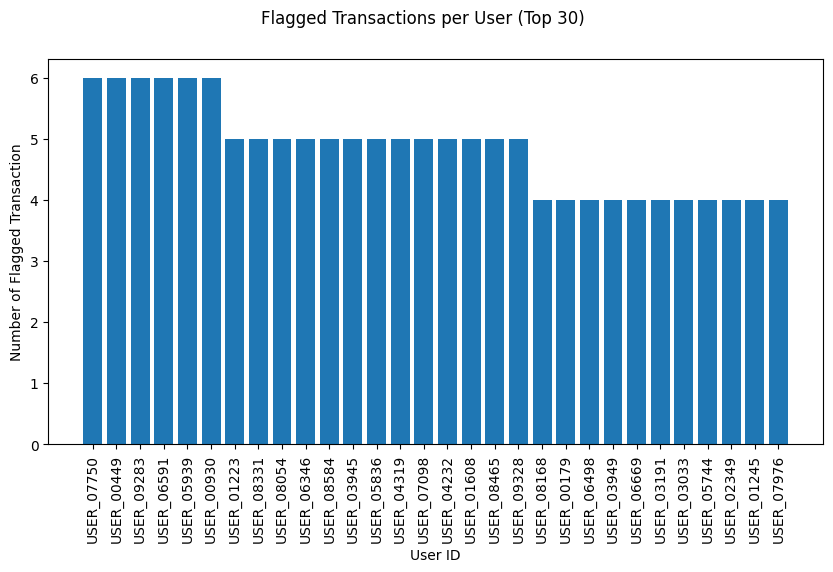

In [72]:
# Create visualization of the Top 30 user's based on flag count
fig, ax = plt.subplots(figsize = (10, 5))

# plot a barchart with user_id vs the count of flags
ax.bar(top_30_users['user_id'], top_30_users['count'], width=0.8)

# Rotate x-ticks to prevent overlap
ax.xaxis.set_tick_params(rotation = 90)

# Create x and y-labels
ax.set_xlabel('User ID')
ax.set_ylabel('Number of Flagged Transaction')

# Create title for figure
fig.suptitle("Flagged Transactions per User (Top 30)")

# Display figure
plt.show()

In [84]:
# Create column that counts number of flags per transaction based on all 5 indicators
# extending the work with only 3 indicators
df['flag_count'] = df.apply(lambda x: (str(x['high_trans_2sig']) + str(x['location_flag']) + 
                                       str(x['mult_pay_flag']) + str(x['irr_product']) + str(x['freq_trans_flag'])
                                                                    ).count('True'), axis = 1)

In [88]:
# Groupby user and flag count (summing the number of flags per user)
user_flag_count_2 = df.groupby('user_id')['flag_count'].sum().sort_values(ascending=False).reset_index(name='count')

# Convert to dataframe with two non-index columns (user_id and count)
df_user_flag_count_2 = pd.DataFrame(user_flag_count_2)

# Display the first 50 (top 50 since sorted)
df_user_flag_count_2.head(50)

,user_id,count
0,USER_00449,9
1,USER_07750,9
2,USER_00930,9
3,USER_07098,8
4,USER_01608,8
5,USER_06591,8
6,USER_01223,8
7,USER_09283,8
8,USER_09328,8
9,USER_08331,8


In [92]:
# Create a dataframe that holds the top 30 users in flag counts
top_30_users_2 = df_user_flag_count_2.head(30)
top_30_users_2

,user_id,count
0,USER_00449,9
1,USER_07750,9
2,USER_00930,9
3,USER_07098,8
4,USER_01608,8
5,USER_06591,8
6,USER_01223,8
7,USER_09283,8
8,USER_09328,8
9,USER_08331,8


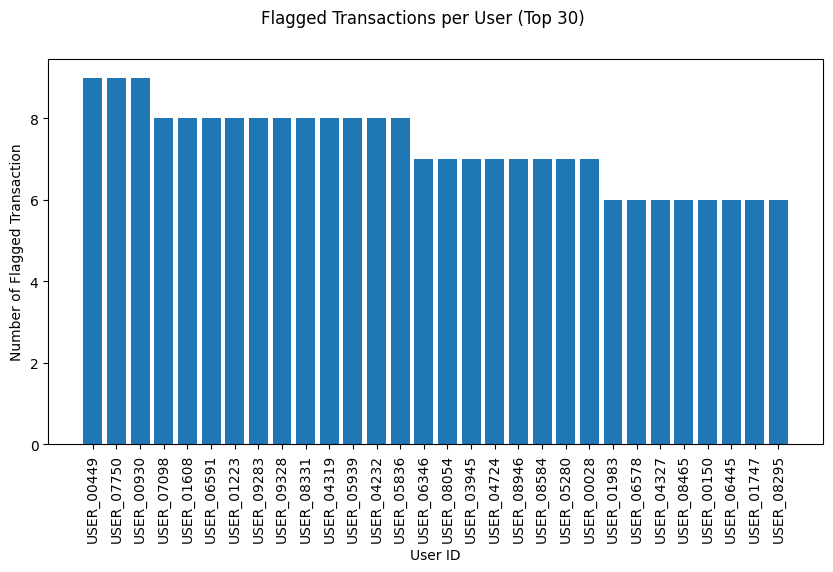

In [94]:
# Create visualization of the Top 30 user's based on flag count
fig, ax = plt.subplots(figsize = (10, 5))

# plot a barchart with user_id vs the count of flags
ax.bar(top_30_users_2['user_id'], top_30_users_2['count'], width=0.8)

# Rotate x-ticks to prevent overlap
ax.xaxis.set_tick_params(rotation = 90)

# Create x and y-labels
ax.set_xlabel('User ID')
ax.set_ylabel('Number of Flagged Transaction')

# Create title for figure
fig.suptitle("Flagged Transactions per User (Top 30)")

# Display figure
plt.show()

In [ ]:
# code use to save to csv usuable in tableau
# df.to_csv('tableau_fraud_data_2.csv', index=False)